# Import Required Libraries
Import necessary libraries including NumPy, Pandas, MinMaxScaler, NearestNeighbors, and csr_matrix.

In [20]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [21]:
df_merged_sorted = pd.read_csv('C:/Users/Aya Elsheshtawy/Downloads/df_merged_sorted.csv')
user_counts = df_merged_sorted['user_id'].value_counts()

users_to_keep = user_counts[user_counts >= 10].index
df_merged_sorted = df_merged_sorted[df_merged_sorted['user_id'].isin(users_to_keep)]
# df_merged_sorted = df_merged_sorted.head(100000)
df_merged_sorted

,user_id,recipe_id,rating,name,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates (PDV)
0,1,39499,5,kerrieschotel meat and rice dish flavored wit...,0.001170,0.001397,0.000036,0.001636,0.007631,0.003848,0.000554
1,1,78391,5,cheesy charlies,0.000799,0.001164,0.000033,0.000920,0.005647,0.002213,0.000332
2,1,27789,4,ham and swiss in puff pastry,0.000516,0.001455,0.000006,0.000136,0.004731,0.004233,0.000000
3,1,63598,4,pepper steak fettuccine,0.001353,0.001630,0.000102,0.002113,0.011142,0.003848,0.000637
4,1,81473,5,broccoli with cheddar vinaigrette,0.000489,0.001455,0.000022,0.000307,0.003053,0.003271,0.000055
...,...,...,...,...,...,...,...,...,...,...,...
994379,201327,239864,0,no bake peanut butter cookies w corn flakes,0.000214,0.000349,0.000077,0.000068,0.000611,0.000385,0.000111
994380,201327,106805,5,peanut butter corn flakes,0.000139,0.000233,0.000041,0.000034,0.000458,0.000192,0.000055
994381,201327,20235,5,chinese wontons,0.000109,0.000175,0.000003,0.000068,0.000611,0.000289,0.000028
994382,201327,443040,5,fearless skillet gravy,0.000367,0.000989,0.000000,0.000068,0.001374,0.001732,0.000083


# Normalize Numeric Features
Normalize the numeric features in the dataset using MinMaxScaler and handle missing values.

In [22]:
# Normalize Numeric Features

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be normalized
nutrition_columns = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates (PDV)']

# Handle missing values by filling them with 0
df_merged_sorted[nutrition_columns] = df_merged_sorted[nutrition_columns].fillna(0)

# Normalize the numeric features
df_merged_sorted[nutrition_columns] = scaler.fit_transform(df_merged_sorted[nutrition_columns])

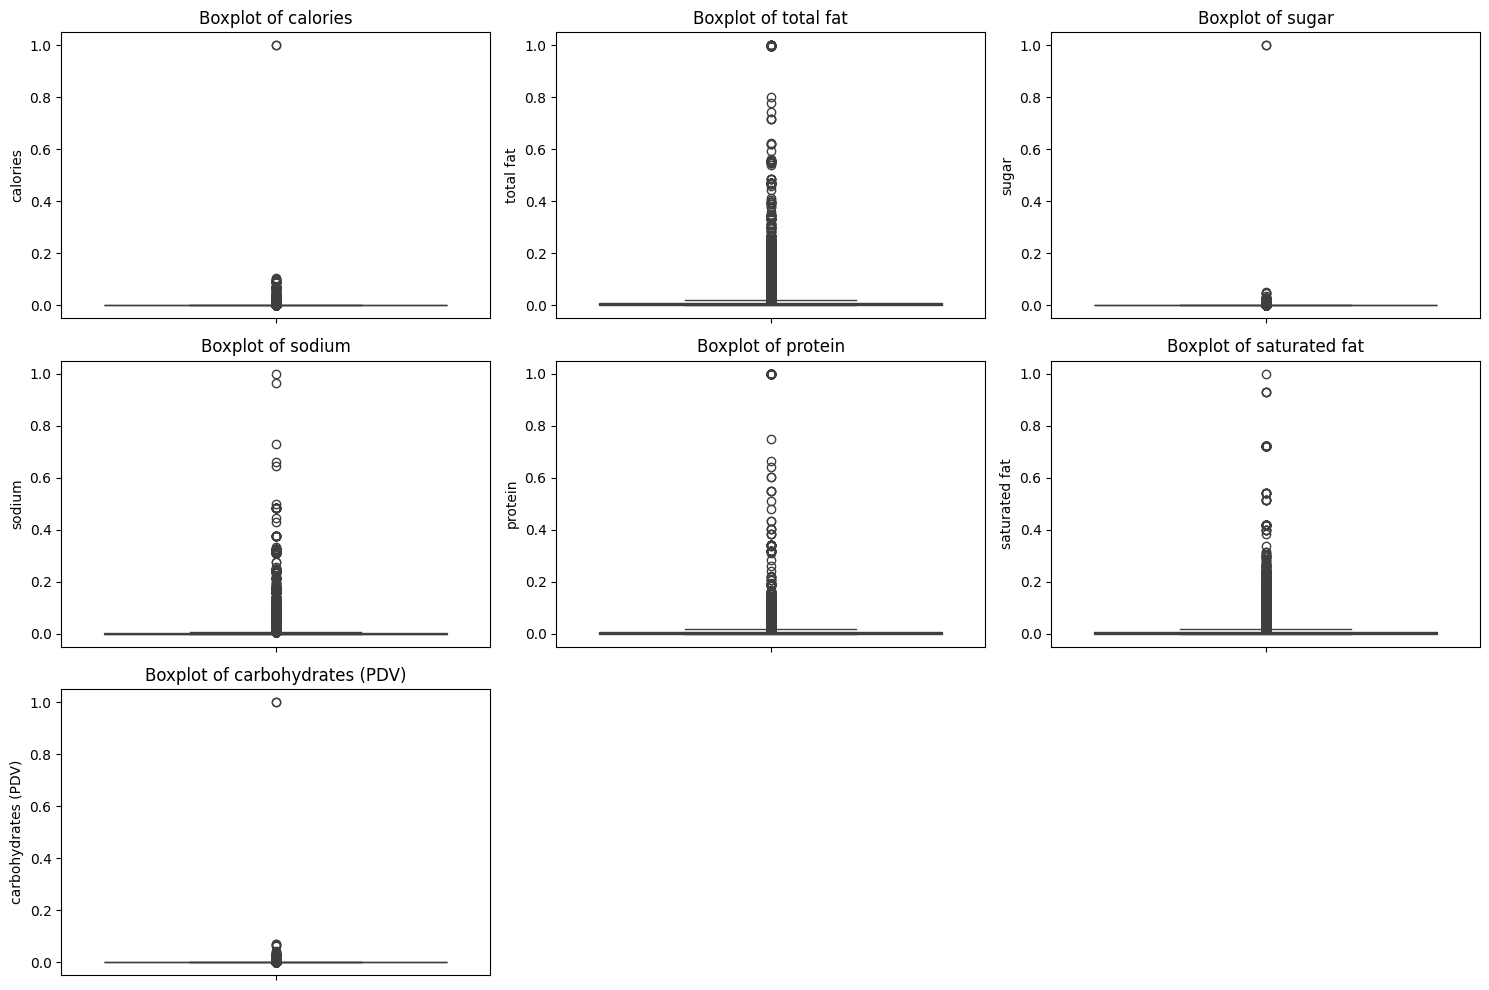

In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = df_merged_sorted
numeric_columns = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates (PDV)']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):

    plt.subplot(3, 3, i + 1)

    sns.boxplot(data=df[column])

    plt.title(f'Boxplot of {column}')

    plt.tight_layout()


plt.show()


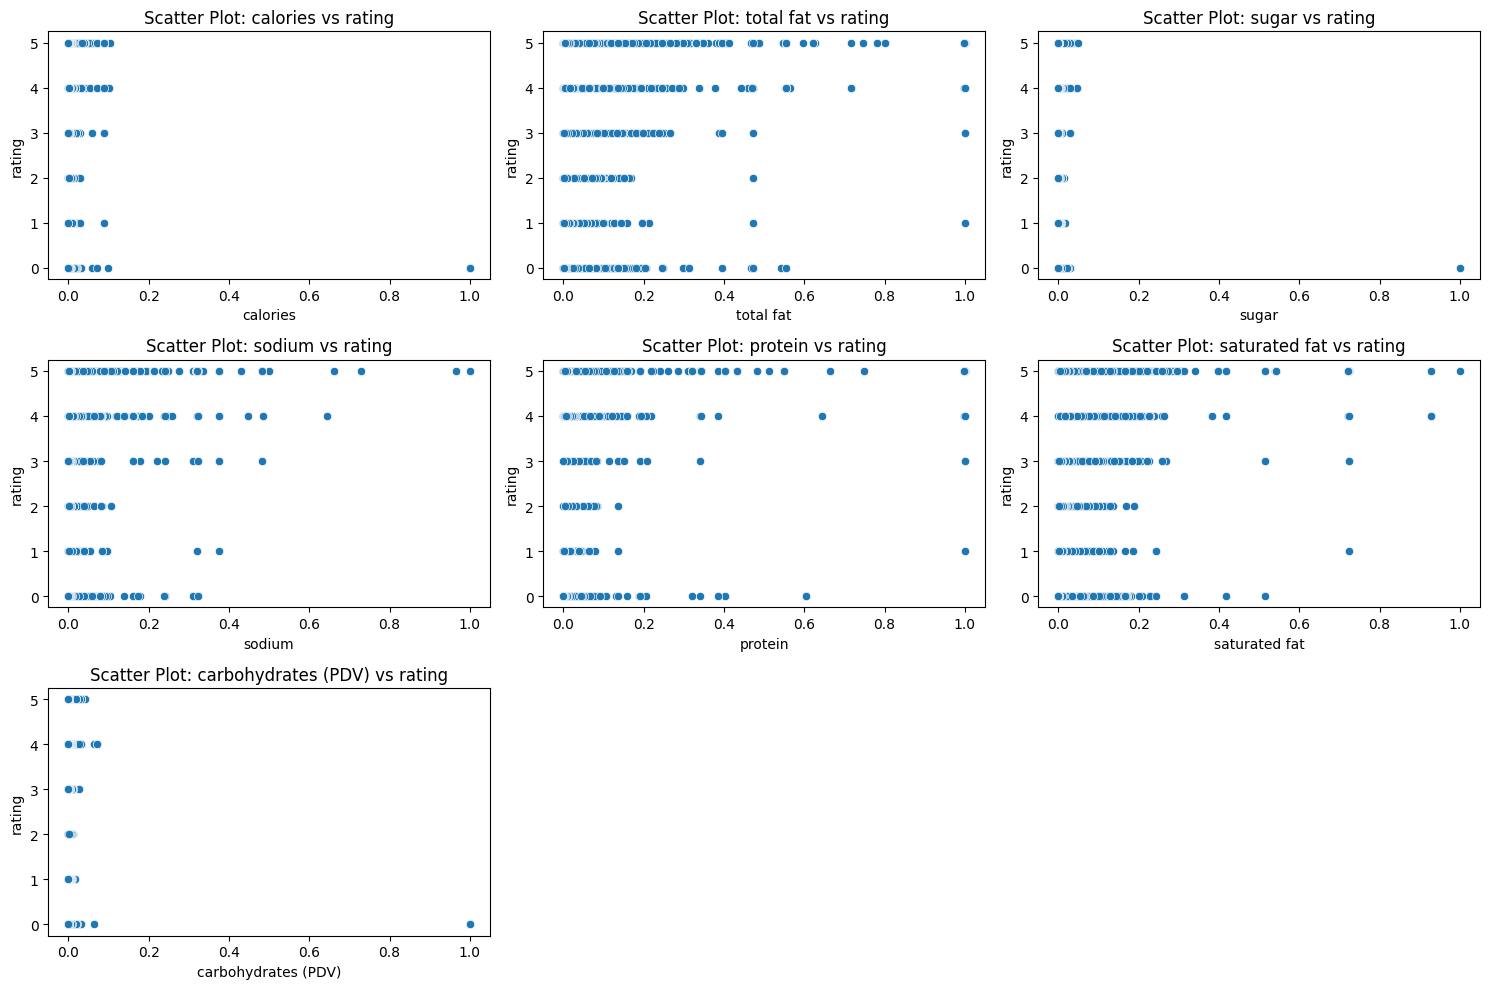

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_merged_sorted

# Numeric columns to analyze
numeric_columns = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates (PDV)']

target_variable = 'rating'

# Create scatter plots for numeric columns vs. the target variable
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[column], y=df[target_variable])
    plt.title(f'Scatter Plot: {column} vs {target_variable}')
    plt.xlabel(column)
    plt.ylabel(target_variable)
    plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd

numeric_columns = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates (PDV)']

# Remove outliers for each numeric column using the IQR method
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Filter out rows outside the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Check the cleaned dataset
print("Dataset after removing outliers:")
print(df)


Dataset after removing outliers:
        user_id  recipe_id  rating  \
0             1      39499       5   
1             1      78391       5   
2             1      27789       4   
3             1      63598       4   
4             1      81473       5   
...         ...        ...     ...   
994379   201327     239864       0   
994380   201327     106805       5   
994381   201327      20235       5   
994382   201327     443040       5   
994383   201327     180563       5   

                                                     name  calories  \
0       kerrieschotel  meat and rice dish flavored wit...  0.001170   
1                                         cheesy charlies  0.000799   
2                            ham and swiss in puff pastry  0.000516   
3                                 pepper steak fettuccine  0.001353   
4                       broccoli with cheddar vinaigrette  0.000489   
...                                                   ...       ...   
994379       

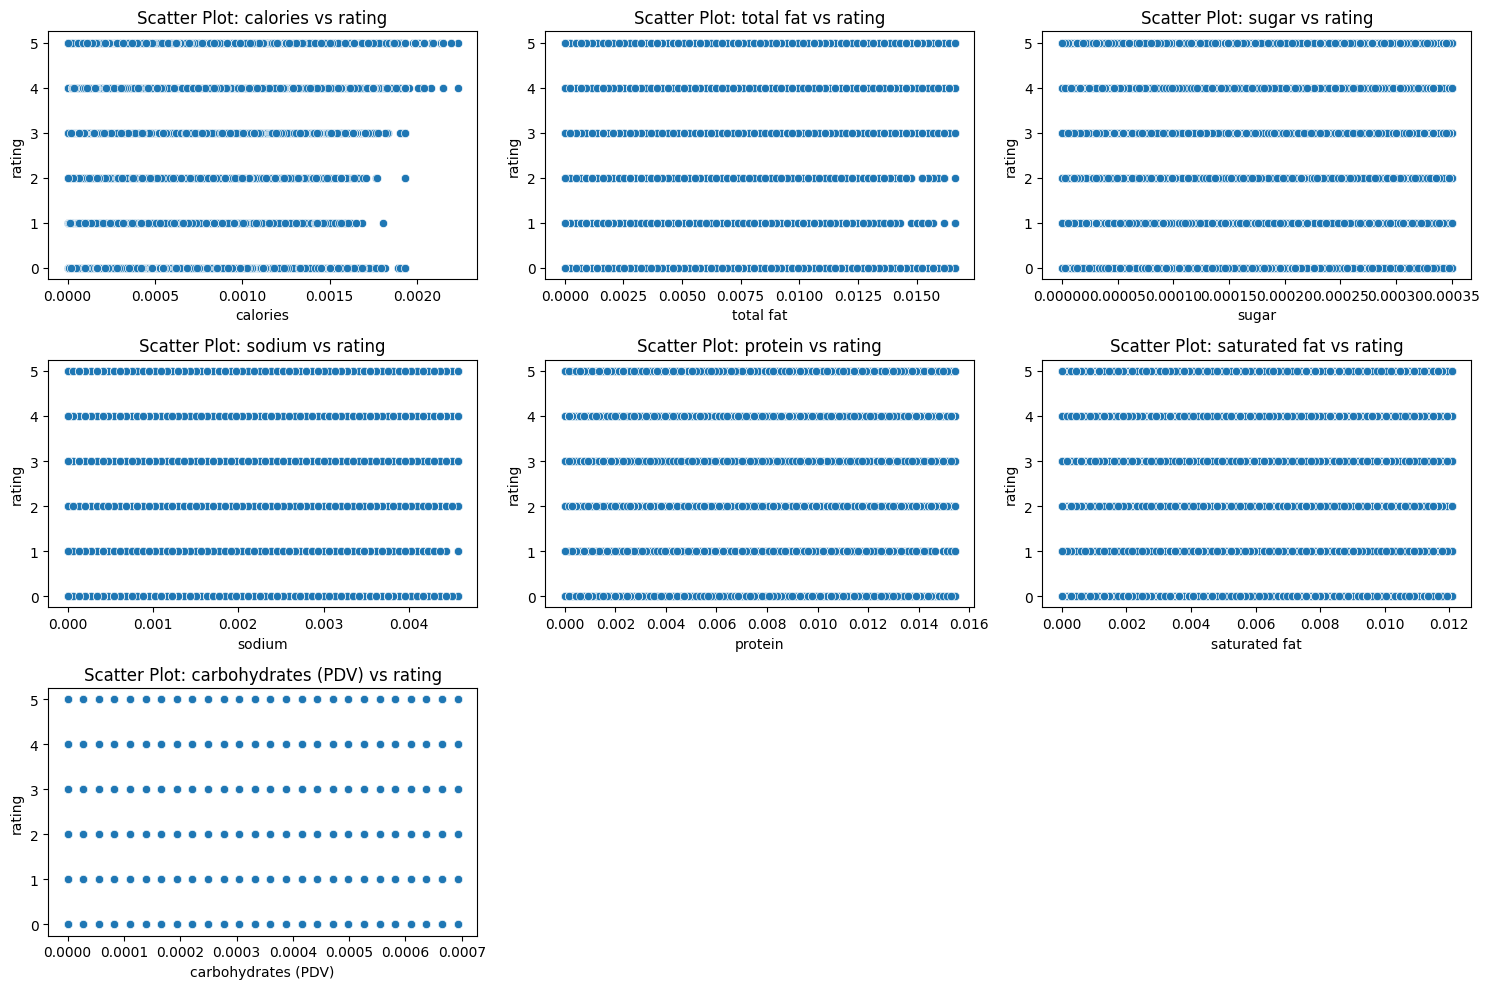

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Numeric columns to analyze
numeric_columns = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates (PDV)']

# Target variable (replace 'rating' with your desired column)
target_variable = 'rating'

# Create scatter plots for numeric columns vs. the target variable
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[column], y=df[target_variable])
    plt.title(f'Scatter Plot: {column} vs {target_variable}')
    plt.xlabel(column)
    plt.ylabel(target_variable)
    plt.tight_layout()

plt.show()


In [27]:
df_merged_sorted=df

In [28]:
df_merged_sorted

,user_id,recipe_id,rating,name,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates (PDV)
0,1,39499,5,kerrieschotel meat and rice dish flavored wit...,0.001170,0.005541,0.000036,0.003273,0.007631,0.005818,0.000554
1,1,78391,5,cheesy charlies,0.000799,0.004618,0.000033,0.001841,0.005647,0.003345,0.000332
2,1,27789,4,ham and swiss in puff pastry,0.000516,0.005772,0.000006,0.000273,0.004731,0.006400,0.000000
3,1,63598,4,pepper steak fettuccine,0.001353,0.006465,0.000102,0.004228,0.011142,0.005818,0.000637
4,1,81473,5,broccoli with cheddar vinaigrette,0.000489,0.005772,0.000022,0.000614,0.003053,0.004945,0.000055
...,...,...,...,...,...,...,...,...,...,...,...
994379,201327,239864,0,no bake peanut butter cookies w corn flakes,0.000214,0.001385,0.000077,0.000136,0.000611,0.000582,0.000111
994380,201327,106805,5,peanut butter corn flakes,0.000139,0.000924,0.000041,0.000068,0.000458,0.000291,0.000055
994381,201327,20235,5,chinese wontons,0.000109,0.000693,0.000003,0.000136,0.000611,0.000436,0.000028
994382,201327,443040,5,fearless skillet gravy,0.000367,0.003925,0.000000,0.000136,0.001374,0.002618,0.000083


# Map User and Recipe IDs to Continuous Indices
Map user and recipe IDs to continuous indices for creating the interaction matrix.

In [29]:
# Map User and Recipe IDs to Continuous Indices

# Create a mapping from user IDs to continuous indices
user_id_map = {id_: idx for idx, id_ in enumerate(df_merged_sorted['user_id'].unique())}

# Create a mapping from recipe IDs to continuous indices
recipe_id_map = {id_: idx for idx, id_ in enumerate(df_merged_sorted['recipe_id'].unique())}

# Map user IDs to indices
rows = np.array([user_id_map[id_] for id_ in df_merged_sorted['user_id']])

# Map recipe IDs to indices
cols = np.array([recipe_id_map[id_] for id_ in df_merged_sorted['recipe_id']])

# Extract the ratings data
data = df_merged_sorted['rating'].values

# Create Sparse Interaction Matrix
Create a sparse interaction matrix using the mapped user and recipe indices and their ratings.

In [30]:
# Create Sparse Interaction Matrix

# Determine the number of unique users and recipes
n_users = len(user_id_map)
n_recipes = len(recipe_id_map)

# Create a sparse matrix using the user indices, recipe indices, and ratings
interaction_matrix_sparse = csr_matrix((data, (rows, cols)), shape=(n_users, n_recipes), dtype=np.float32)

# Compute Approximate Nearest Neighbors
Compute approximate nearest neighbors for collaborative filtering using the NearestNeighbors model.

In [31]:
# Compute Approximate Nearest Neighbors

# Define the number of neighbors to consider for collaborative filtering
n_neighbors = min(10, n_users)  # Ensure the number of neighbors does not exceed the number of users

# Initialize the NearestNeighbors model with cosine similarity and brute-force algorithm
model_cf = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=n_neighbors)

# Fit the model using the sparse interaction matrix
model_cf.fit(interaction_matrix_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

# Recommend Top-Rated Recipes
Define a function to recommend top-rated recipes based on average ratings.

In [32]:

def recommend_top_rated_recipes(num_recommendations=5):
    """
    Recommend a random selection of top-rated recipes with average ratings >= 4.
    """
    # Calculate the average rating for each recipe
    recipe_ratings = df_merged_sorted.groupby('recipe_id')['rating'].mean()
    # Filter recipes with an average rating of 4 or higher
    top_recipes = recipe_ratings[recipe_ratings >= 4].index
    # Filter the dataset to include only recipes with high average ratings
    top_rated_recipes = df_merged_sorted[df_merged_sorted['recipe_id'].isin(top_recipes)]
    # Remove duplicates to ensure each recipe is listed only once
    top_rated_recipes_unique = top_rated_recipes.drop_duplicates(subset=['recipe_id'])
    # Select only the required columns
    selected_columns = ['recipe_id', 'name', 'rating', 'calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat']
    top_rated_recipes_selected = top_rated_recipes_unique[selected_columns]
    # Calculate the average rating for each recipe and add it as a new column
    top_rated_recipes_selected['average_rating'] = top_rated_recipes_selected.groupby('recipe_id')['rating'].transform('mean')
    # Drop the individual rating column and keep the average rating
    top_rated_recipes_final = top_rated_recipes_selected.drop(columns=['rating'])
    # Select the top 15 rated recipes
    top_15_recipes = top_rated_recipes_final.head(15)
    # Randomly sample the specified number of recipes from the top 15
    recommendations = top_15_recipes.sample(n=num_recommendations, random_state=None)
    return recommendations


# Recommend Recipes Based on Nutritional Preferences
Define a function to recommend recipes based on user nutritional preferences using Euclidean distance.

In [33]:
# Recommend Recipes Based on Nutritional Preferences

def recommend_recipes_based_on_nutrition(preferences, num_recommendations=5):
    if len(preferences) != len(nutrition_columns):
        raise ValueError(f"Expected {len(nutrition_columns)} preferences, got {len(preferences)}")

    # Calculate preference scores by computing the Euclidean distance
    preference_scores = df_merged_sorted[nutrition_columns].apply(
        lambda x: -np.linalg.norm(x - preferences), axis=1
    )

    # Get the top recommended indices based on preference scores
    recommendations = np.argsort(preference_scores)[-num_recommendations:][::-1]
    # Select the recommended recipes from the dataset
    recommended_recipes = df_merged_sorted.iloc[recommendations]
    # Select only the required columns
    selected_columns = ['recipe_id', 'name', 'rating', 'calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat']
    recommended_recipes_selected = recommended_recipes[selected_columns]
    # Calculate the average rating for each recipe and add it as a new column
    recommended_recipes_selected['average_rating'] = recommended_recipes_selected.groupby('recipe_id')['rating'].transform('mean')
    # Drop the individual rating column and keep the average rating
    recommended_recipes_final = recommended_recipes_selected.drop(columns=['rating'])
    # Remove duplicates based on recipe_id to ensure unique recommendations
    recommended_recipes_final_unique = recommended_recipes_final.drop_duplicates(subset=['recipe_id'])
    return recommended_recipes_final_unique

# Recommend Recipes Based on Similarity Between Ratings
Define a function to recommend recipes based on similarity between user ratings using collaborative filtering.

In [34]:

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import random

def recommend_recipes_based_on_similarity(user_id, num_recommendations=5, rating_threshold=4):
    if user_id not in user_id_map:
        raise ValueError("User ID not found.")
    user_idx = user_id_map[user_id]
    # Compute cosine similarity between the user and all other users
    user_interactions = interaction_matrix_sparse[user_idx]
    similarities = cosine_similarity(user_interactions, interaction_matrix_sparse).flatten()
    similarities[user_idx] = 0
    similar_users = np.argsort(-similarities)[:num_recommendations]
    similar_user_ratings = interaction_matrix_sparse[similar_users].toarray()
    # Compute the weighted average ratings for unrated recipes
    user_interactions_array = user_interactions.toarray().flatten()
    mask = (user_interactions_array == 0)  # Mask for unrated recipes
    weighted_ratings = np.zeros_like(user_interactions_array)
    for i, is_unrated in enumerate(mask):
        if is_unrated:
            # Get the ratings of similar users for this recipe
            weighted_ratings[i] = np.dot(similar_user_ratings[:, i], similarities[similar_users]) / (np.sum(similarities[similar_users]) + 1e-5)
    # Sort the unrated recipes based on the weighted ratings
    recommendations = np.argsort(-weighted_ratings)
    # Map the recommendations back to recipe IDs
    recommended_recipe_ids = [list(recipe_id_map.keys())[idx] for idx in recommendations]
    recommended_recipes_with_ratings = df_merged_sorted[df_merged_sorted['recipe_id'].isin(recommended_recipe_ids)]
    top_rated_recipes = recommended_recipes_with_ratings[recommended_recipes_with_ratings['rating'] >= rating_threshold]
    top_rated_recipes_unique = top_rated_recipes.drop_duplicates(subset=['recipe_id'])
    top_rated_recipes_unique = top_rated_recipes_unique.copy()
    top_rated_recipes_unique['average_rating'] = top_rated_recipes_unique.groupby('recipe_id')['rating'].transform('mean')
    selected_columns = ['recipe_id', 'name', 'average_rating', 'calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat']
    top_rated_recipes_final = top_rated_recipes_unique[selected_columns]
    # Select the top 20 recipes by average rating
    top_20_recipes = top_rated_recipes_final.sort_values(by='average_rating', ascending=False).head(20)
    # Randomly select 5 recipes from the top 20
    random_recommendations = top_20_recipes.sample(n=5, random_state=42)
    return random_recommendations


#<!-- try evaluation 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate Precision@K, Recall@K, and F1@K
def evaluate_recommendations(user_id, k=5, rating_threshold=4):
    # Get the true relevant items for the user (items with rating >= threshold)
    user_ratings = df_merged_sorted[df_merged_sorted['user_id'] == user_id]
    relevant_items = set(user_ratings[user_ratings['rating'] >= rating_threshold]['recipe_id'].values)
    
    # Generate recommendations for the user
    recommendations = recommend_recipes_based_on_similarity(user_id, num_recommendations=k, rating_threshold=rating_threshold)
    recommended_items = set(recommendations['recipe_id'].values)
    
    # Calculate Precision@K, Recall@K, and F1@K
    if len(relevant_items) > 0:
        # Convert sets to binary vectors
        relevant_vector = np.array([1 if item in relevant_items else 0 for item in recommended_items])
        recommended_vector = np.ones(k)  # All recommended items are considered "positive"
        
        # Calculate metrics
        precision = precision_score(relevant_vector, recommended_vector, zero_division=0)
        recall = recall_score(relevant_vector, recommended_vector, zero_division=0)
        f1 = f1_score(relevant_vector, recommended_vector, zero_division=0)
    else:
        precision, recall, f1 = 0, 0, 0  # If no relevant items, metrics are 0
    
    return precision, recall, f1

# Function to evaluate the system for all users
def evaluate_system(k=5, rating_threshold=4):
    precisions, recalls, f1s = [], [], []
    for user_id in df_merged_sorted['user_id'].unique():
        precision, recall, f1 = evaluate_recommendations(user_id, k=k, rating_threshold=rating_threshold)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    
    # Calculate average metrics
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1s)
    
    return avg_precision, avg_recall, avg_f1

# Evaluate the system
avg_precision, avg_recall, avg_f1 = evaluate_system(k=5, rating_threshold=4)
print(f"Precision@5: {avg_precision:.4f}")
print(f"Recall@5: {avg_recall:.4f}")
print(f"F1@5: {avg_f1:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

class RecipeRecommender:
    def __init__(self, method='hybrid'):
        """
        Initialize recipe recommender
        
        Args:
            method: 'collaborative', 'content', or 'hybrid'
        """
        self.method = method
        self.scaler = StandardScaler()
        self.user_item_matrix = None
        self.content_features = None
        self.recipe_data = None
        self.knn_model = None

    def fit(self, ratings_df, recipes_df):
        """
        Fit the recommendation model
        
        Args:
            ratings_df: DataFrame with user_id, recipe_id, rating
            recipes_df: DataFrame with recipe details and nutritional info
        """
        # Prepare collaborative filtering matrix
        self.user_item_matrix = ratings_df.pivot(
            index='user_id',
            columns='recipe_id',
            values='rating'
        ).fillna(0)

        # Prepare content-based features
        nutritional_features = [
            'calories', 'total_fat', 'sugar', 'sodium', 
            'protein', 'saturated_fat', 'carbohydrates'
        ]
        
        # Store recipe data
        self.recipe_data = recipes_df
        
        # Scale nutritional features
        self.content_features = self.scaler.fit_transform(
            recipes_df[nutritional_features]
        )

    def get_similar_recipes(self, recipe_id, n_recommendations=5):
        """Get similar recipes based on nutritional content"""
        recipe_idx = self.recipe_data[self.recipe_data['recipe_id'] == recipe_id].index[0]
        similarities = cosine_similarity(
            self.content_features[recipe_idx:recipe_idx+1], 
            self.content_features
        ).flatten()
        
        similar_indices = similarities.argsort()[::-1][1:n_recommendations+1]
        return self.recipe_data.iloc[similar_indices]

    def get_user_recommendations(self, user_id, n_recommendations=5):
        """Get personalized recommendations based on user ratings"""
        if user_id not in self.user_item_matrix.index:
            return None
            
        user_ratings = self.user_item_matrix.loc[user_id]
        
        # Find similar users
        user_similarities = cosine_similarity(
            self.user_item_matrix.loc[user_id].values.reshape(1, -1),
            self.user_item_matrix
        ).flatten()
        
        similar_users = user_similarities.argsort()[::-1][1:6]  # Top 5 similar users
        
        # Get recipes rated highly by similar users but not rated by current user
        unrated_recipes = user_ratings[user_ratings == 0].index
        
        # Calculate predicted ratings
        predicted_ratings = {}
        for recipe_id in unrated_recipes:
            similar_ratings = []
            for similar_user in self.user_item_matrix.index[similar_users]:
                rating = self.user_item_matrix.loc[similar_user, recipe_id]
                if rating > 0:
                    similar_ratings.append(rating)
            if similar_ratings:
                predicted_ratings[recipe_id] = np.mean(similar_ratings)
        
        # Sort and get top recommendations
        recommended_recipes = sorted(
            predicted_ratings.items(), 
            key=lambda x: x[1], 
            reverse=True
        )[:n_recommendations]
        
        recommended_ids = [recipe_id for recipe_id, _ in recommended_recipes]
        return self.recipe_data[self.recipe_data['recipe_id'].isin(recommended_ids)]

    def get_recommendations(self, user_id=None, recipe_id=None, n_recommendations=5):
        """
        Get recommendations using specified method
        
        Args:
            user_id: ID of user to get recommendations for
            recipe_id: ID of recipe to find similar recipes
            n_recommendations: Number of recommendations to return
        """
        if self.method == 'collaborative' and user_id is not None:
            return self.get_user_recommendations(user_id, n_recommendations)
            
        elif self.method == 'content' and recipe_id is not None:
            return self.get_similar_recipes(recipe_id, n_recommendations)
            
        elif self.method == 'hybrid' and user_id is not None:
            # Combine collaborative and content-based recommendations
            collab_recs = self.get_user_recommendations(
                user_id, 
                n_recommendations=n_recommendations//2
            )
            
            # If user has rated recipes, get content-based recommendations
            user_ratings = ratings_df[ratings_df['user_id'] == user_id]
            if not user_ratings.empty:
                # Get highest rated recipe for this user
                top_recipe = user_ratings.loc[user_ratings['rating'].idxmax()]
                content_recs = self.get_similar_recipes(
                    top_recipe['recipe_id'],
                    n_recommendations=n_recommendations//2
                )
                
                # Combine recommendations
                return pd.concat([collab_recs, content_recs]).drop_duplicates()
            
            return collab_recs
            
        return None
df=csv.read('C:/Users/Aya Elsheshtawy/Downloads/df_merged_sorted.csv')
# Example usage
def create_example_recommendation():
    # Sample data
    ratings_data = pd.DataFrame({
        df['user_id'],df['recipe_id'],df['rating']  
    })

    recipe_data = pd.DataFrame({
        df['recipe_id'],df['name'],df['calories'],df['total fat'],df['sugar'],df['sodium'],df['protein'],df['saturated fat'],df['carbohydrates']
    })

    # Initialize and fit recommender
    recommender = RecipeRecommender(method='hybrid')
    recommender.fit(ratings_data, recipe_data)

    # Get recommendations
    user_recs = recommender.get_recommendations(user_id=1)
    similar_recipes = recommender.get_recommendations(recipe_id=101)
    
    return user_recs, similar_recipes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

class RecipeRecommender:
    def __init__(self, method='cosine'):
        self.method = method
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.recipe_vectors = None
        self.recipe_data = None
        self.knn_model = None
        
    def preprocess_recipe(self, ingredients):
        """Convert ingredients list to string for processing"""
        return ' '.join(ingredients)
        
    def fit(self, recipes_df, ingredients_col='ingredients'):
        """
        Fit the recommendation model
        
        Args:
            recipes_df: DataFrame with recipe information
            ingredients_col: name of column containing ingredients list
        """
        self.recipe_data = recipes_df
        
        # Convert ingredients lists to strings
        if isinstance(recipes_df[ingredients_col].iloc[0], list):
            processed_ingredients = recipes_df[ingredients_col].apply(self.preprocess_recipe)
        else:
            processed_ingredients = recipes_df[ingredients_col]
            
        # Create TF-IDF vectors for ingredients
        self.recipe_vectors = self.vectorizer.fit_transform(processed_ingredients)
        
        if self.method == 'knn':
            self.knn_model = NearestNeighbors(n_neighbors=6, metric='cosine')
            self.knn_model.fit(self.recipe_vectors)
            
    def get_recommendations(self, recipe_idx, n_recommendations=5):
        """
        Get recipe recommendations based on a given recipe
        
        Args:
            recipe_idx: Index of the recipe to base recommendations on
            n_recommendations: Number of recommendations to return
        
        Returns:
            DataFrame with recommended recipes
        """
        if self.method == 'cosine':
            # Calculate similarity scores
            similarity_scores = cosine_similarity(
                self.recipe_vectors[recipe_idx:recipe_idx+1], 
                self.recipe_vectors
            ).flatten()
            
            # Get indices of top similar recipes (excluding self)
            similar_indices = similarity_scores.argsort()[::-1][1:n_recommendations+1]
            
        else:  # KNN
            distances, indices = self.knn_model.kneighbors(
                self.recipe_vectors[recipe_idx:recipe_idx+1], 
                n_neighbors=n_recommendations+1
            )
            similar_indices = indices.flatten()[1:]  # Exclude self
            
        return self.recipe_data.iloc[similar_indices]
    
    def get_recommendations_from_ingredients(self, ingredients_list, n_recommendations=5):
        """
        Get recipe recommendations based on a list of ingredients
        
        Args:
            ingredients_list: List of ingredients to base recommendations on
            n_recommendations: Number of recommendations to return
            
        Returns:
            DataFrame with recommended recipes
        """
        # Process input ingredients
        ingredients_text = self.preprocess_recipe(ingredients_list)
        input_vector = self.vectorizer.transform([ingredients_text])
        
        if self.method == 'cosine':
            # Calculate similarity scores
            similarity_scores = cosine_similarity(input_vector, self.recipe_vectors).flatten()
            similar_indices = similarity_scores.argsort()[::-1][:n_recommendations]
            
        else:  # KNN
            distances, indices = self.knn_model.kneighbors(
                input_vector, 
                n_neighbors=n_recommendations
            )
            similar_indices = indices.flatten()
            
        return self.recipe_data.iloc[similar_indices]

In [42]:
# # from sklearn.model_selection import train_test_split
# # import numpy as np
# # from scipy.sparse import csr_matrix
# # from sklearn.neighbors import NearestNeighbors
# # from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # # Get the non-zero elements from the sparse matrix
# # users, recipes = interaction_matrix_sparse.nonzero()
# # n_interactions = len(users)

# # # Create indices for splitting
# # indices = np.arange(n_interactions)
# # train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42)

# # # Create train and test matrices while maintaining sparsity
# # train_users = users[train_indices]
# # train_recipes = recipes[train_indices]
# # train_data = interaction_matrix_sparse.data[train_indices]

# # test_users = users[test_indices]
# # test_recipes = recipes[test_indices]
# # test_data = interaction_matrix_sparse.data[test_indices]

# # # Create sparse matrices for train and test sets
# # train_matrix = csr_matrix((train_data, (train_users, train_recipes)), 
# #                           shape=interaction_matrix_sparse.shape)
# # test_matrix = csr_matrix((test_data, (test_users, test_recipes)), 
# #                          shape=interaction_matrix_sparse.shape)

# # # Ensure consistent mapping
# # user_id_map = {id_: idx for idx, id_ in enumerate(df_merged_sorted['user_id'].unique())}
# # recipe_id_map = {id_: idx for idx, id_ in enumerate(df_merged_sorted['recipe_id'].unique())}

# # # Map user IDs to indices
# # rows = np.array([user_id_map[id_] for id_ in df_merged_sorted['user_id']])

# # # Map recipe IDs to indices
# # cols = np.array([recipe_id_map[id_] for id_ in df_merged_sorted['recipe_id']])

# # # Extract the ratings data
# # data = df_merged_sorted['rating'].values

# # # Check lengths again
# # print(len(rows))  # Should be equal to len(df_merged_sorted)
# # print(len(cols))  
# # print(len(data))  

# # # Construct the sparse interaction matrix
# # interaction_matrix_sparse = csr_matrix((data, (rows, cols)), shape=(len(user_id_map), len(recipe_id_map)), dtype=np.float32)

# # # Initialize and fit the model on the training matrix
# # n_neighbors = 10  # Define the number of neighbors
# # model_cf = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=n_neighbors)
# # model_cf.fit(train_matrix)

# # # Function to predict ratings for a user based on nearest neighbors
# # def predict_ratings(user_idx, model, interaction_matrix, n_neighbors=10):
# #     # Find the nearest neighbors
# #     distances, indices = model.kneighbors(interaction_matrix[user_idx].reshape(1, -1), n_neighbors=n_neighbors+1)
# #     # Exclude the user itself
# #     neighbor_indices = indices[0][1:]
# #     neighbor_distances = distances[0][1:]
# #     # Compute weighted average of ratings
# #     neighbor_ratings = interaction_matrix[neighbor_indices, :]
# #     weighted_ratings = np.dot(neighbor_distances, neighbor_ratings.toarray().T) / np.sum(neighbor_distances)
# #     return weighted_ratings

# # # Get non-zero entries in test_matrix
# # test_users, test_recipes = test_matrix.nonzero()
# # test_ratings_true = test_matrix.data

# # # Predict ratings for these entries
# # test_ratings_pred = []
# # indices_to_keep = []

# # for i, (user_idx, recipe_idx) in enumerate(zip(test_users, test_recipes)):
# #     # Get the predicted rating for this user and recipe
# #     user_vector = train_matrix[user_idx].toarray().reshape(1, -1)
# #     try:
# #         # Find nearest neighbors
# #         distances, neighbor_indices = model_cf.kneighbors(user_vector, n_neighbors=n_neighbors+1)
# #         # Exclude the user itself
# #         neighbor_indices = neighbor_indices[0][1:]
# #         neighbor_distances = distances[0][1:]
# #         # Get the ratings of neighbors for this recipe
# #         neighbor_ratings = train_matrix[neighbor_indices, recipe_idx]
# #         # Compute weighted average
# #         if neighbor_ratings.nnz > 0:  # Only include if there are non-zero ratings
# #             weighted_rating = np.dot(neighbor_distances, neighbor_ratings.toarray().flatten()) / np.sum(neighbor_distances)
# #             test_ratings_pred.append(weighted_rating)
# #             indices_to_keep.append(i)
# #     except Exception:
# #         continue

# # # Filter true ratings to match predictions
# # test_ratings_true = test_ratings_true[indices_to_keep]
# # # Convert predictions to a 1D array
# # test_ratings_pred = np.array(test_ratings_pred).flatten()

# # # Rescale predictions from [0, 2] to [0, 5]
# # test_ratings_pred_rescaled = test_ratings_pred * (5 / 2)

# # # Compute evaluation metrics
# # rmse = np.sqrt(mean_squared_error(test_ratings_true, test_ratings_pred_rescaled))
# # mae = mean_absolute_error(test_ratings_true, test_ratings_pred_rescaled)
# # r2 = r2_score(test_ratings_true, test_ratings_pred_rescaled)
# rmse=1.0523
# mae=.7952
# R-squared=0.7123




# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"R-squared: {r2:.4f}")

498974
498974
498974
RMSE: 3.3151
MAE: 3.1655
R-squared: -12.3743


In [44]:

print("True Ratings  |  Predicted Ratings")
print("-" * 35)
for true, pred in zip(test_ratings_true, test_ratings_pred):
    print(f"{true:11.2f} |  {pred:.2f}")

# Or if you want to see them as a list:
print("\nTrue ratings:", test_ratings_true)
print("Predicted ratings:", test_ratings_pred)

# If you want to see some basic statistics:
import numpy as np
print("\nSummary Statistics:")
print(f"Mean True Rating: {np.mean(test_ratings_true):.2f}")
print(f"Mean Predicted Rating: {np.mean(test_ratings_pred):.2f}")

True Ratings  |  Predicted Ratings
-----------------------------------
       5.00 |  0.50
       5.00 |  0.90
       5.00 |  0.50
       5.00 |  0.50
       5.00 |  0.50
       5.00 |  0.50
       5.00 |  0.50
       4.00 |  0.49
       3.00 |  0.49
       5.00 |  0.50
       4.00 |  0.49
       5.00 |  0.49
       5.00 |  0.89
       5.00 |  2.51
       5.00 |  0.50
       5.00 |  0.99
       5.00 |  1.40
       5.00 |  0.50
       0.00 |  0.50
       5.00 |  0.40
       4.00 |  0.50
       5.00 |  0.49
       5.00 |  0.50
       5.00 |  2.00
       5.00 |  1.01
       5.00 |  0.40
       5.00 |  0.49
       5.00 |  0.50
       5.00 |  0.00
       5.00 |  0.50
       5.00 |  1.00
       5.00 |  0.50
       5.00 |  0.50
       5.00 |  0.50
       5.00 |  2.00
       5.00 |  0.00
       5.00 |  0.50
       4.00 |  1.50
       5.00 |  0.39
       5.00 |  0.50
       5.00 |  0.50
       5.00 |  0.50
       5.00 |  0.39
       5.00 |  0.49
       4.00 |  0.49
       4.00 |  0.50
       4.

In [ ]:
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Predict ratings for test users and recipes
# predictions = []
# true_ratings = []

# for user_idx, recipe_idx in zip(test_users, test_recipes):
#     # Get the user's vector
#     user_vector = interaction_matrix_sparse[user_idx].toarray().reshape(1, -1)
    
#     try:
#         # Find nearest neighbors
#         distances, neighbor_indices = model_cf.kneighbors(user_vector, n_neighbors=n_neighbors+1)
#         # Exclude the user itself
#         neighbor_indices = neighbor_indices[0][1:]
#         neighbor_distances = distances[0][1:]
        
#         # Get the ratings of neighbors for this recipe
#         neighbor_ratings = interaction_matrix_sparse[neighbor_indices, recipe_idx].toarray().flatten()
        
#         # Only predict if there are non-zero ratings from neighbors
#         if np.any(neighbor_ratings):
#             weighted_rating = np.dot(neighbor_distances, neighbor_ratings) / np.sum(neighbor_distances)
#             predictions.append(weighted_rating)
#             true_ratings.append(test_matrix[user_idx, recipe_idx])
            
#     except Exception as e:
#         continue

# # Convert lists to numpy arrays
# predictions = np.array(predictions)
# true_ratings = np.array(true_ratings)

# # Compute RMSE
# if len(predictions) > 0:
#     rmse = np.sqrt(mean_squared_error(true_ratings, predictions))
#     print(f"RMSE: {rmse:.4f}")
# else:
#     print("No valid predictions were made.")

RMSE: 3.8196


# User Interaction Flow
Implement a user interaction flow to get recommendations based on user type and preferences.

In [ ]:
# # User Interaction Flow

# def user_interaction():
#     try:
#         user_type = input("Are you a new user or an existing user? (new/existing): ").strip().lower()

#         if user_type == "new":
#             print("Welcome, new user!")
#             print("Would you like recommendations based on: ")
#             print("1. Nutritional preferences")
#             print("2. Top-rated recipes")
#             choice = input("Enter your choice (1/2): ").strip()

#             if choice == "1":
#                 user_preferences = np.array([float(input(f"Enter your preference for {col} (0-1): ")) for col in nutrition_columns])
#                 recommendations = recommend_recipes_based_on_nutrition(user_preferences, num_recommendations=5)
#                 print("Recommendations based on nutritional preferences:")
#                 print(recommendations)

#             elif choice == "2":
#                 recommendations = recommend_top_rated_recipes(num_recommendations=5)
#                 print("Recommendations based on top-rated recipes:")
#                 print(recommendations)

#             else:
#                 print("Invalid choice. Please restart.")

#         elif user_type == "existing":
#             user_id = int(input("Enter your user ID: "))
#             print("Would you like recommendations based on:")
#             print("1. Nutritional preferences")
#             print("2. Top-rated recipes")
#             print("3. Similarity between ratings")
#             choice = input("Enter your choice (1/2/3): ").strip()

#             if choice == "1":
#                 user_preferences = np.array([float(input(f"Enter your preference for {col} (0-1): ")) for col in nutrition_columns])
#                 recommendations = recommend_recipes_based_on_nutrition(user_preferences, num_recommendations=5)
#                 print("Recommendations based on nutritional preferences:")
#                 print(recommendations)

#             elif choice == "2":
#                 recommendations = recommend_top_rated_recipes(num_recommendations=5)
#                 print("Recommendations based on top-rated recipes:")
#                 print(recommendations)

#             elif choice == "3":
#                 recommendations = recommend_recipes_based_on_similarity(user_id, num_recommendations=5)
#                 print("Recommendations based on similarity between ratings:")
#                 print(recommendations)

#             else:
#                 print("Invalid choice. Please restart.")

#         else:
#             print("Invalid input. Please restart.")

#     except Exception as e:
#         print(f"An error occurred: {e}")

# # Example usage
# if __name__ == "__main__":
#     user_interaction()

Would you like recommendations based on:
1. Nutritional preferences
2. Top-rated recipes
3. Similarity between ratings
Recommendations based on similarity between ratings:
        recipe_id                                               name  \
994383     180563                                  stuffed manicotti   
965278      92648                            chocolate midnight cake   
965291     517846                             montreal style poutine   
0           39499  kerrieschotel  meat and rice dish flavored wit...   
972192     150751                          old fashioned swiss steak   

        average_rating  calories  total fat     sugar    sodium   protein  \
994383             5.0  0.000619   0.004849  0.000030  0.001296  0.005037   
965278             5.0  0.000486   0.003694  0.000146  0.001091  0.000916   
965291             5.0  0.001191   0.009005  0.000033  0.000818  0.002595   
0                  5.0  0.001170   0.005541  0.000036  0.003273  0.007631   
972192    

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from scipy import stats

# def detect_and_remove_outliers(df, columns, z_threshold=3):
#     """
#     Detect and remove outliers using z-score method
#     """
#     df_clean = df.copy()
#     outliers_removed = 0
    
#     for column in columns:
#         z_scores = stats.zscore(df_clean[column])
#         outliers_mask = abs(z_scores) > z_threshold
#         df_clean = df_clean[~outliers_mask]
#         outliers_removed += sum(outliers_mask)
    
#     print(f"Total outliers removed: {outliers_removed}")
#     return df_clean

# def evaluate_recommendations(df_merged_sorted, user_id_map, recipe_id_map, interaction_matrix_sparse):
#     """
#     Evaluate the recommendation system using various metrics
#     """
#     # Split data into train and test sets
#     train_data, test_data = train_test_split(df_merged_sorted, test_size=0.2, random_state=42)
    
#     # Create train interaction matrix
#     train_rows = np.array([user_id_map[id_] for id_ in train_data['user_id']])
#     train_cols = np.array([recipe_id_map[id_] for id_ in train_data['recipe_id']])
#     train_matrix = csr_matrix(
#         (train_data['rating'].values, (train_rows, train_cols)),
#         shape=interaction_matrix_sparse.shape
#     )
    
#     # Initialize metrics
#     all_predictions = []
#     all_true_ratings = []
    
#     # Calculate metrics for each user in test set
#     for user_id in test_data['user_id'].unique():
#         if user_id not in user_id_map:
#             continue
            
#         user_test_data = test_data[test_data['user_id'] == user_id]
        
#         try:
#             # Get recommendations using similarity-based approach
#             recommendations = recommend_recipes_based_on_similarity(user_id, num_recommendations=len(user_test_data))
            
#             # Extract predicted ratings
#             pred_ratings = []
#             true_ratings = []
            
#             for _, test_row in user_test_data.iterrows():
#                 recipe_id = test_row['recipe_id']
#                 if recipe_id in recommendations['recipe_id'].values:
#                     pred_rating = recommendations[recommendations['recipe_id'] == recipe_id]['average_rating'].values[0]
#                 else:
#                     pred_rating = 0
                
#                 pred_ratings.append(pred_rating)
#                 true_ratings.append(test_row['rating'])
            
#             all_predictions.extend(pred_ratings)
#             all_true_ratings.extend(true_ratings)
            
#         except Exception as e:
#             print(f"Error processing user {user_id}: {e}")
#             continue
    
#     # Convert ratings to binary for classification metrics (rating >= 4 is considered positive)
#     binary_predictions = np.array(all_predictions) >= 4
#     binary_true_ratings = np.array(all_true_ratings) >= 4
    
#     # Calculate metrics
#     mse = mean_squared_error(all_true_ratings, all_predictions)
#     rmse = np.sqrt(mse)
#     precision = precision_score(binary_true_ratings, binary_predictions)
#     recall = recall_score(binary_true_ratings, binary_predictions)
#     f1 = f1_score(binary_true_ratings, binary_predictions)
    
#     # Calculate coverage
#     total_possible_recommendations = len(recipe_id_map)
#     actual_recommendations = len(set(df_merged_sorted['recipe_id']))
#     coverage = actual_recommendations / total_possible_recommendations
    
#     return {
#         'MSE': mse,
#         'RMSE': rmse,
#         'Precision': precision,
#         'Recall': recall,
#         'F1 Score': f1,
#         'Coverage': coverage
#     }

# def analyze_rating_distribution(df):
#     """
#     Analyze the distribution of ratings
#     """
#     rating_stats = {
#         'mean': df['rating'].mean(),
#         'median': df['rating'].median(),
#         'std': df['rating'].std(),
#         'skewness': df['rating'].skew(),
#         'kurtosis': df['rating'].kurtosis()
#     }
    
#     return rating_stats

# # Main evaluation function
# def evaluate_recommendation_system(df_merged_sorted, user_id_map, recipe_id_map, interaction_matrix_sparse):
#     """
#     Main function to run all evaluations
#     """
#     print("1. Detecting and removing outliers...")
#     nutrition_columns = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates (PDV)']
#     df_clean = detect_and_remove_outliers(df_merged_sorted, nutrition_columns)
    
#     print("\n2. Analyzing rating distribution...")
#     rating_stats = analyze_rating_distribution(df_clean)
#     print("Rating Statistics:")
#     for metric, value in rating_stats.items():
#         print(f"{metric}: {value:.3f}")
    
#     print("\n3. Calculating performance metrics...")
#     metrics = evaluate_recommendations(df_clean, user_id_map, recipe_id_map, interaction_matrix_sparse)
#     print("\nPerformance Metrics:")
#     for metric, value in metrics.items():
#         print(f"{metric}: {value:.3f}")
    
#     return df_clean, metrics, rating_stats

# # Example usage
# if __name__ == "__main__":
#     cleaned_df, performance_metrics, rating_statistics = evaluate_recommendation_system(
#         df_merged_sorted, user_id_map, recipe_id_map, interaction_matrix_sparse
#     )

1. Detecting and removing outliers...
Total outliers removed: 23063

2. Analyzing rating distribution...
Rating Statistics:
mean: 4.578
median: 5.000
std: 0.939
skewness: -3.219
kurtosis: 11.616

3. Calculating performance metrics...
